In [8]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
from hmmlearn import hmm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from scipy.signal import spectrogram
import os


In [9]:

# Function to load the recorded speech signal
def load_recorded_signal(file_path):
    return librosa.load(file_path)


In [10]:
def stft_feature(signal, n_fft=2048, hop_length=512):
    stft = np.abs(librosa.stft(signal, n_fft=n_fft, hop_length=hop_length))
    return stft.T

In [11]:
# Function to generate and plot spectrogram of the recorded speech signal
def generate_spectrogram(signal, sr):
    f, t, Sxx = spectrogram(signal, sr)
    plt.pcolormesh(t, f, 10 * np.log10(Sxx), shading='gouraud')
    plt.title('Spectrogram')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.colorbar(label='Intensity (dB)')
    plt.show()


C:\Users\Prahas\AppData\Local\Temp\ipykernel_12296\1127048304.py:4: RuntimeWarning: divide by zero encountered in log10
  plt.pcolormesh(t, f, 10 * np.log10(Sxx), shading='gouraud')


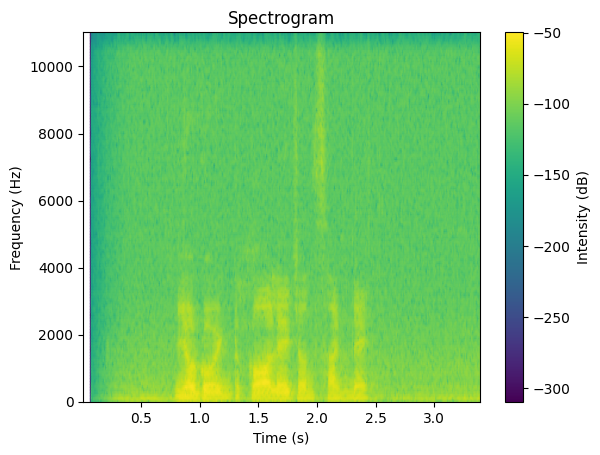

In [12]:
y, sr = load_recorded_signal(r"E:\ASEB\3rd Year\6th\Speech Processing\AI-in-Speech-Processing\Lab-7\Statement.wav")
# Extract STFT features from the recorded speech
stft_features = stft_feature(y)
generate_spectrogram(y,sr)


In [ ]:
n_components = 3 
n_iter = 100  

# Train the HMM model
model = hmm.GaussianHMM(n_components=n_components, n_iter=n_iter)
model.fit(stft_features.T)

# Perform classification
predicted_labels = model.predict(stft_features.T)  
predicted_class = np.argmax(np.bincount(predicted_labels)) 

print("Predicted class:", predicted_class)

In [ ]:
# Performing the classification task
predicted_labels = model.predict(stft_features.T)

# Printing the state sequences
print("State Sequence is:")
print()
print(predicted_labels)

In [ ]:
# Plotting the state sequence predicted by the HMM
plt.figure(figsize=(10,6))
plt.title('State Sequence Predicted by HMM')
plt.plot(predicted_labels)
plt.xlabel('Time Frame')
plt.ylabel('State')
plt.show()

In [ ]:
colors = ['blue', 'green', 'red'] 

# Plot the means of the Gaussian distributions (emission probabilities)
plt.figure(figsize=(10, 6))
plt.title('Emission Probabilities')
for i in range(model.n_components):
    plt.plot(model.means_[i], label=f'Hidden State {i+1}', color=colors[i])

plt.xlabel('Observation Index')
plt.ylabel('Mean')
plt.legend()
plt.tight_layout()
plt.show()

In [13]:
# Function to prepare dataset for HMM
def prepare_dataset(spectrogram, window_size=10):
    # Slide a window over the spectrogram
    X = []
    for i in range(0, spectrogram.shape[1] - window_size):
        X.append(spectrogram[:, i:i+window_size].flatten())
    return np.array(X)

In [ ]:
# Prepare dataset
X = prepare_dataset(stft_features)

# Split data into training and testing sets
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

# Train HMM model
n_components = 3  # Number of states in HMM
model = hmm.GaussianHMM(n_components=n_components)
model.fit(X_train)

# Test the model
log_likelihood = model.score(X_test)
print("Log likelihood of the test set:", log_likelihood)